In [1]:
# Import standard library modules
import sys

# Set the relative path to the project root directory
relative_path_to_root = "../../../"

# Add the project root to the system path for importing in-house modules
sys.path.append(relative_path_to_root)

# Import in-house modules from the 'utilities' package
from utilities import load_data

In [2]:
# Data manipulation and analysis
import pandas as pd

# File and directory manipulation
from pathlib import Path

# Data preprocessing and model selection
from sklearn.model_selection import train_test_split

In [3]:
file_name = "sp500_adj_close_raw"
file_path = f"../../../data/raw_data/{file_name}"

raw_data = load_data(file_path)

╔═══════════════════════════════════════════════════════════════╗
║File `sp500_adj_close_raw.csv.bz2` loaded from `sp500_adj_close_raw.zip`║
╚═══════════════════════════════════════════════════════════════╝


### Exploratory Data Analysis (EDA):
___

In [4]:
# Remove rows with today's date and seperate into a new dataframe
todays_date = "2024-10-23"
filter_data_by_date = raw_data["Date"] == todays_date

# Create a new dataframe with today's data
todays_data = raw_data[filter_data_by_date].reset_index(drop=True)

print("Shape:", todays_data.shape)
display(todays_data.tail())

Shape: (501, 14)


,Date,Ticker,Adjusted Close,Return,Volatility,RSI,SMA_50,SMA_100,SMA_200,Upper Band,Lower Band,Support,Resistance,Action
496,2024-10-23,XYL,131.74,0.002817,0.009287,45.930984,133.56926,134.558320,130.65660,137.970140,131.13087,126.71,137.53000,buy
497,2024-10-23,YUM,134.01,0.004874,0.010931,33.050730,134.76096,133.576890,133.94536,140.494570,130.85544,129.71,139.92000,buy
498,2024-10-23,ZBH,104.68,0.004028,0.010726,51.860280,107.59999,108.161766,115.56048,108.536896,101.40522,101.77,115.91237,buy
499,2024-10-23,ZBRA,368.08,-0.010538,0.009870,55.442924,354.97920,335.774200,309.98975,378.896670,362.71933,320.77,377.68000,short
500,2024-10-23,ZTS,188.99,-0.002744,0.010509,45.437954,189.21500,183.135120,179.39548,196.476970,186.50803,180.90,196.48000,sell


In [5]:
# Create a new dataframe with historical data (excluding today's data)
historical_data = raw_data[~filter_data_by_date]

print("Shape:", historical_data.shape)
display(historical_data.tail())

Shape: (1979178, 14)


,Date,Ticker,Adjusted Close,Return,Volatility,RSI,SMA_50,SMA_100,SMA_200,Upper Band,Lower Band,Support,Resistance,Action
1979173,2024-10-22,XYL,131.37,0.002817,0.009529,41.234707,133.561680,134.64737,130.55756,137.83467,131.453340,126.71,137.53000,buy
1979174,2024-10-22,YUM,133.36,0.004874,0.012310,22.212175,134.818900,133.60426,133.90901,140.53230,130.725700,129.71,139.92000,buy
1979175,2024-10-22,ZBH,104.26,0.004028,0.010689,44.982456,107.687744,108.26137,115.64309,108.65896,101.441536,101.77,115.91237,buy
1979176,2024-10-22,ZBRA,372.00,-0.010538,0.009591,54.217484,354.260000,335.21680,309.45480,379.07470,362.230320,320.77,377.68000,short
1979177,2024-10-22,ZTS,189.51,-0.002744,0.010508,43.550476,189.202800,182.93680,179.42395,196.46294,186.776060,180.90,196.48000,sell


___

In [6]:
# Drop columns that are not needed
columns_to_drop = ["Date", "Ticker", "Action"]

data = historical_data.copy().drop(columns=columns_to_drop)

print("Shape:", data.shape)
data.head()

Shape: (1979178, 11)


,Adjusted Close,Return,Volatility,RSI,SMA_50,SMA_100,SMA_200,Upper Band,Lower Band,Support,Resistance
0,23.256384,-0.009918,0.015705,48.827618,23.314175,23.299887,23.564934,24.727250,22.540232,21.392035,24.351929
1,5.876342,0.000462,0.018937,59.067432,5.518483,4.939064,4.197630,6.135834,5.403559,4.637376,6.026839
2,18.130205,-0.006092,0.010484,34.677586,18.138458,17.628250,17.709028,19.233109,18.221804,16.775562,19.134010
3,7.608889,0.020444,0.016022,45.154190,7.785511,7.878933,7.874161,8.114465,7.378535,7.463333,8.307778
4,26.437078,-0.017194,0.024039,54.812183,26.577982,27.784420,28.471031,28.227205,24.273773,24.765505,29.215664


In [7]:
# Split the data into features (X) and target (y)
X = data.drop(columns="Return")

y = data["Return"].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1979178, 10)
Shape of y: (1979178, 1)


___
___
___

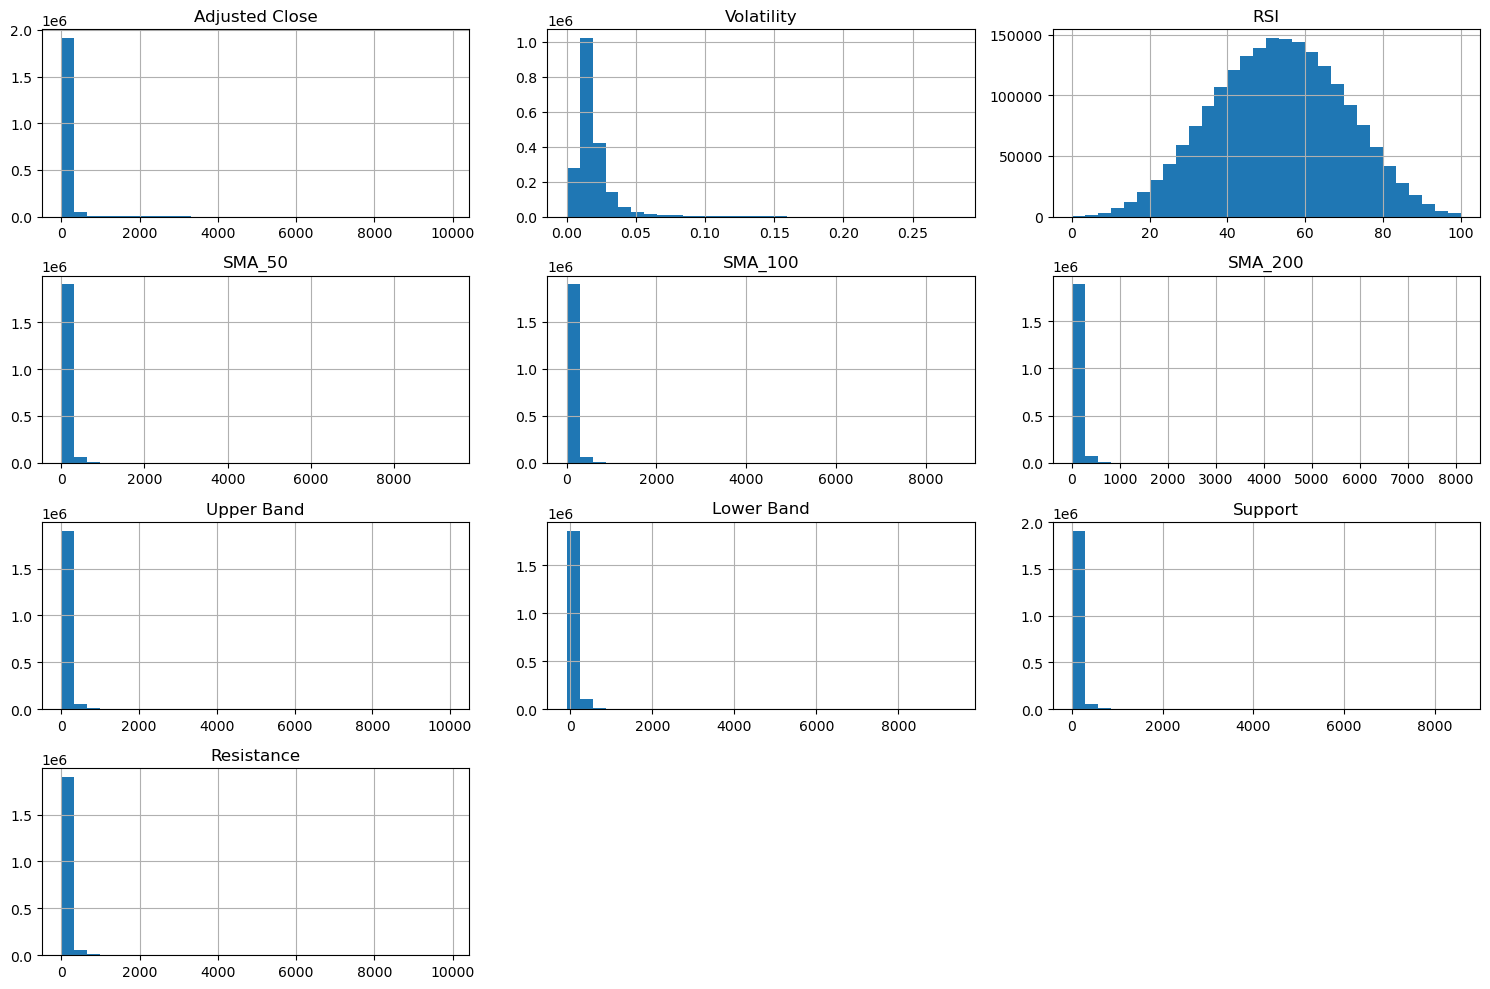

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
X.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

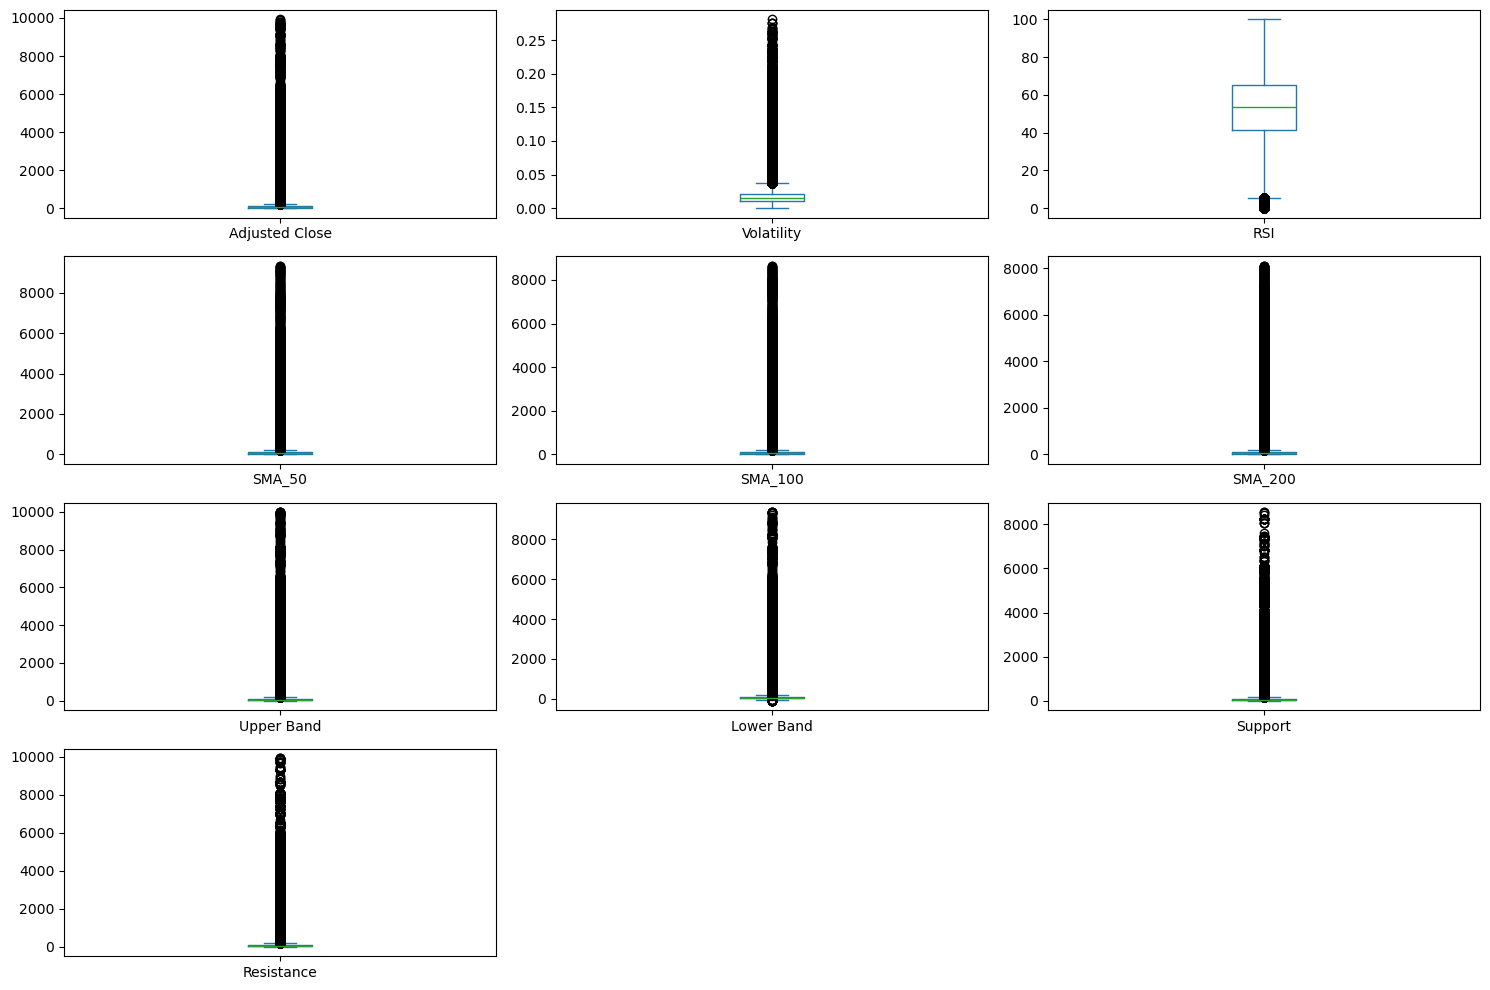

In [16]:
# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
X.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

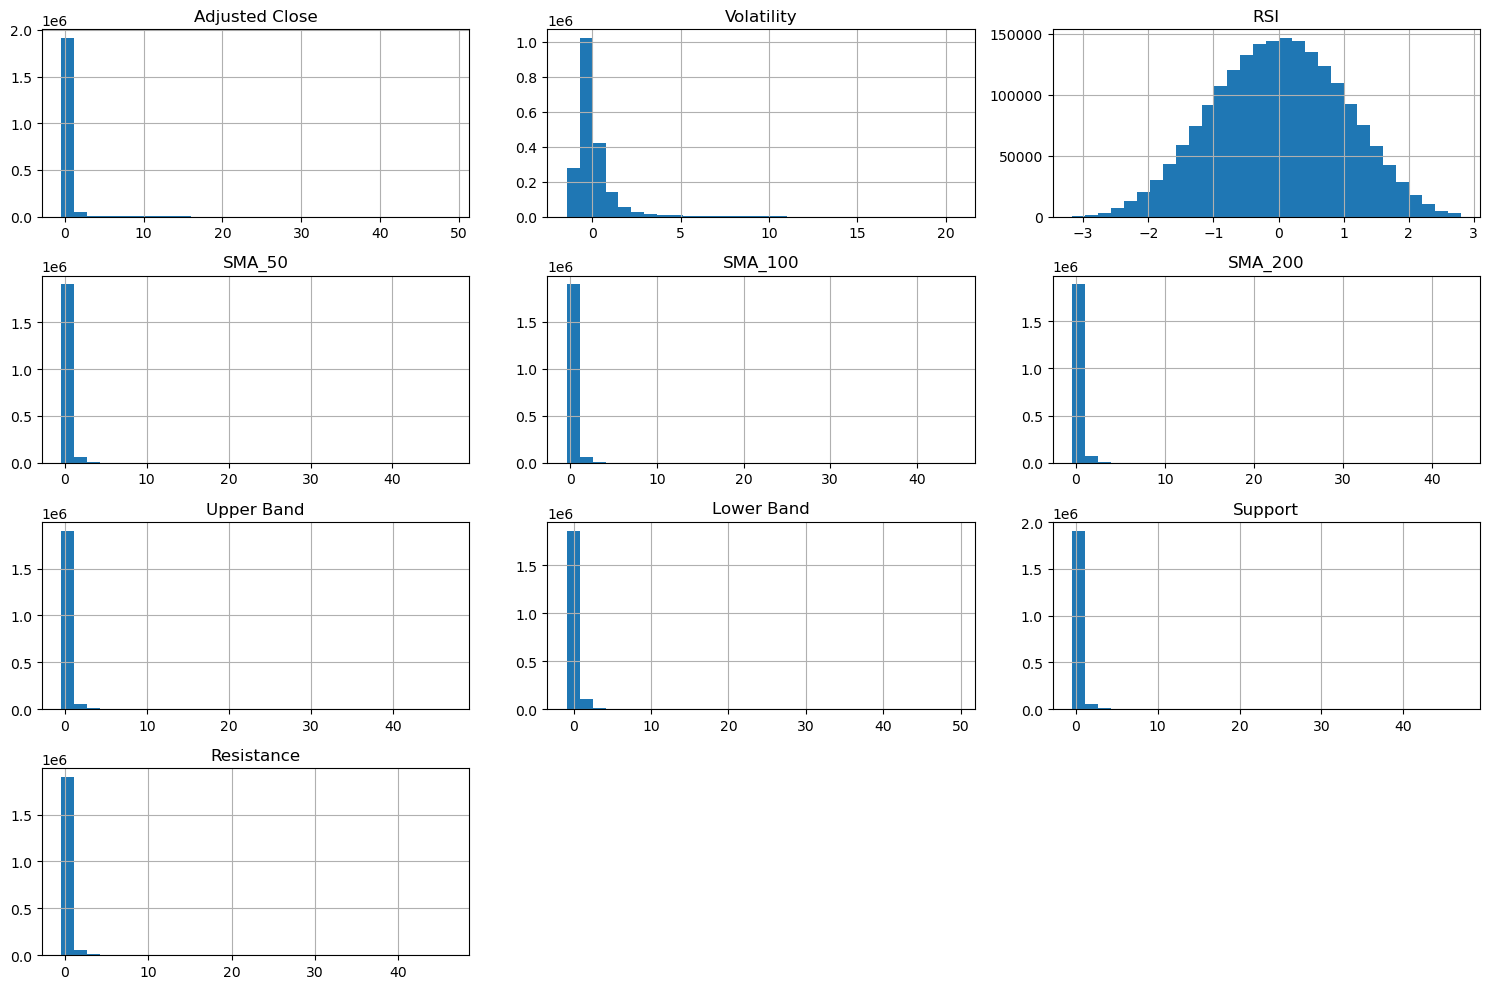

In [17]:
from sklearn.preprocessing import StandardScaler

features_to_inspect = ['Adjusted Close', 'Volatility', 'RSI', 'SMA_50', 'SMA_100', 'SMA_200', 
                       'Upper Band', 'Lower Band', 'Support', 'Resistance']

# StandardScaler
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(X)

# Convert to DataFrame for visualization
df_standard_scaled = pd.DataFrame(scaled_standard, columns=features_to_inspect)

# Plot histograms after scaling
df_standard_scaled.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

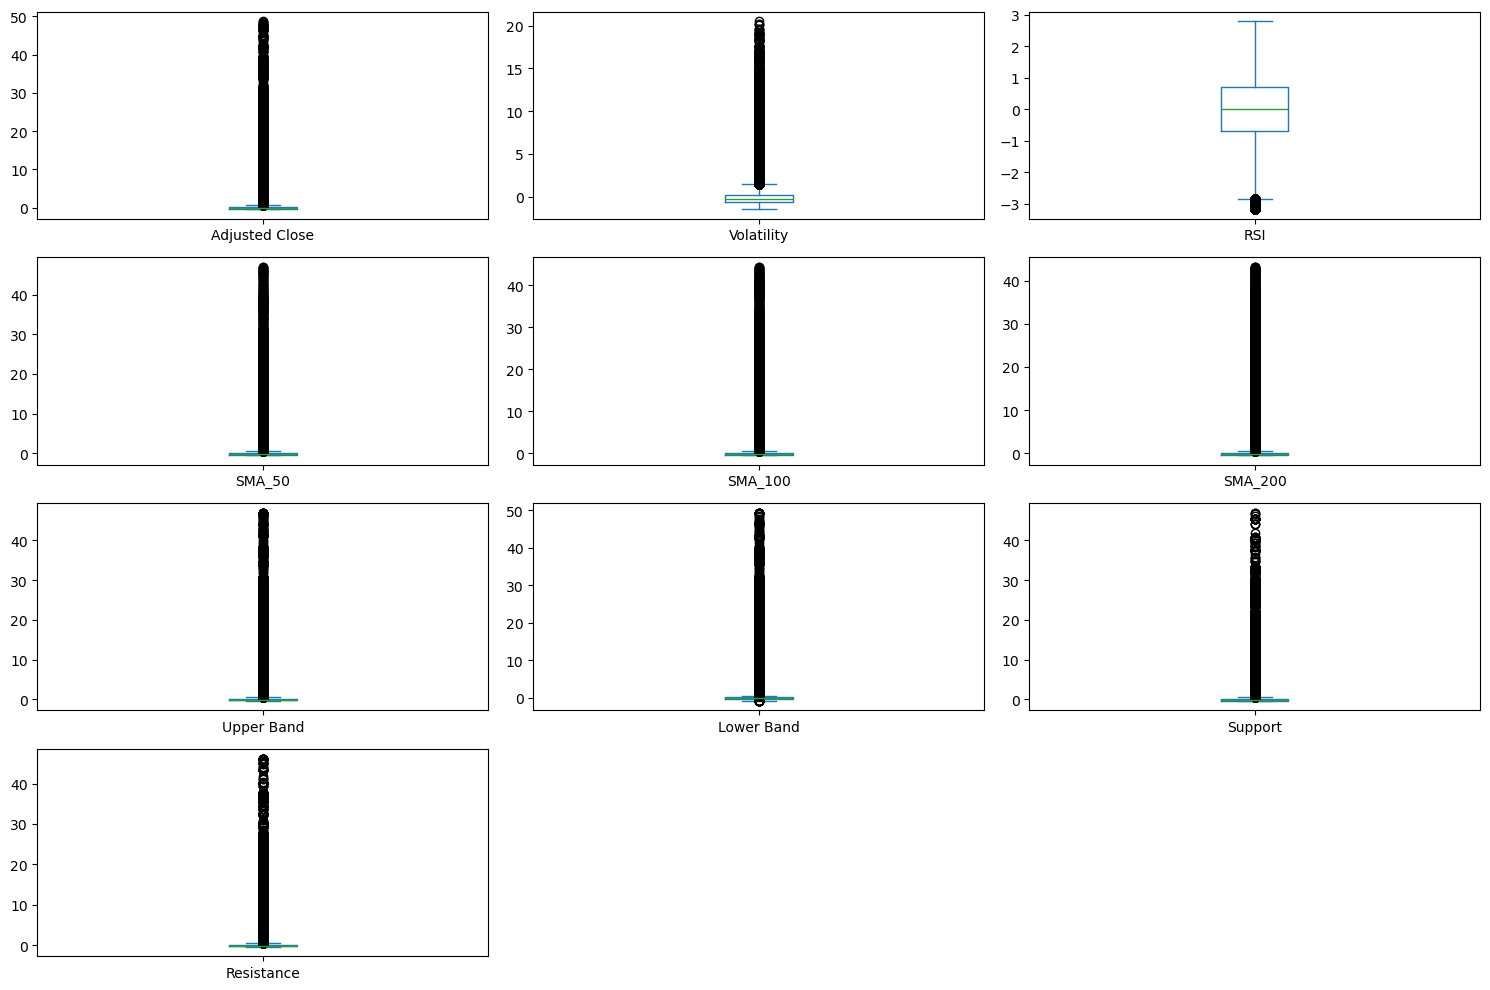

In [21]:
# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
df_standard_scaled.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

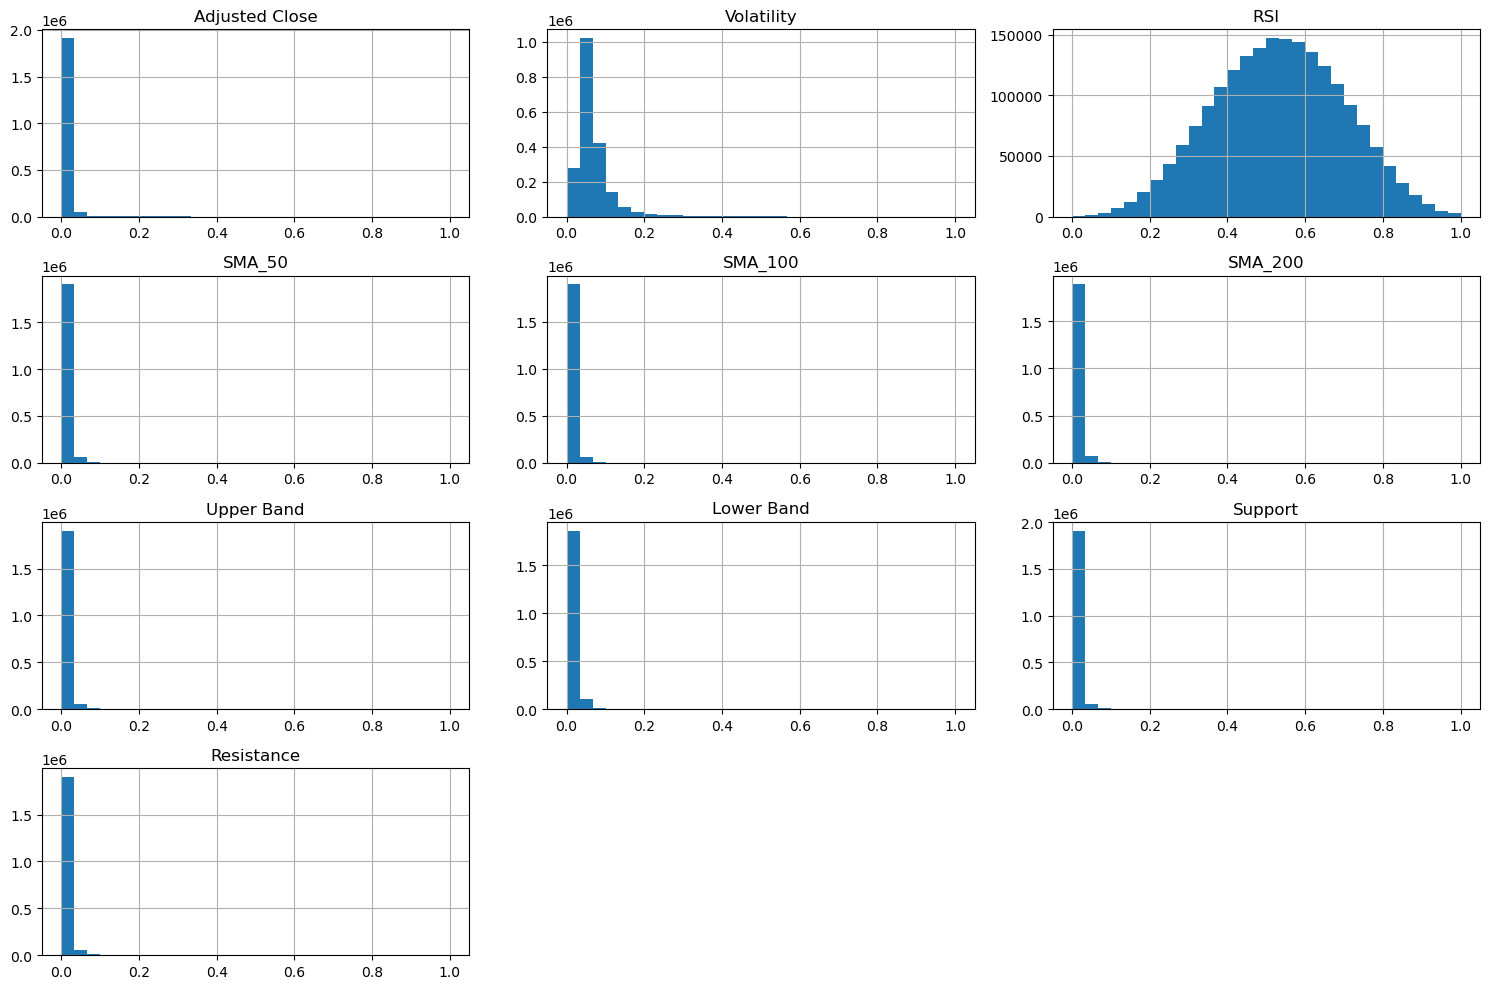

In [19]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(X)

# Convert to DataFrame for visualization
df_minmax_scaled = pd.DataFrame(scaled_minmax, columns=features_to_inspect)

# Plot histograms after scaling
df_minmax_scaled.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

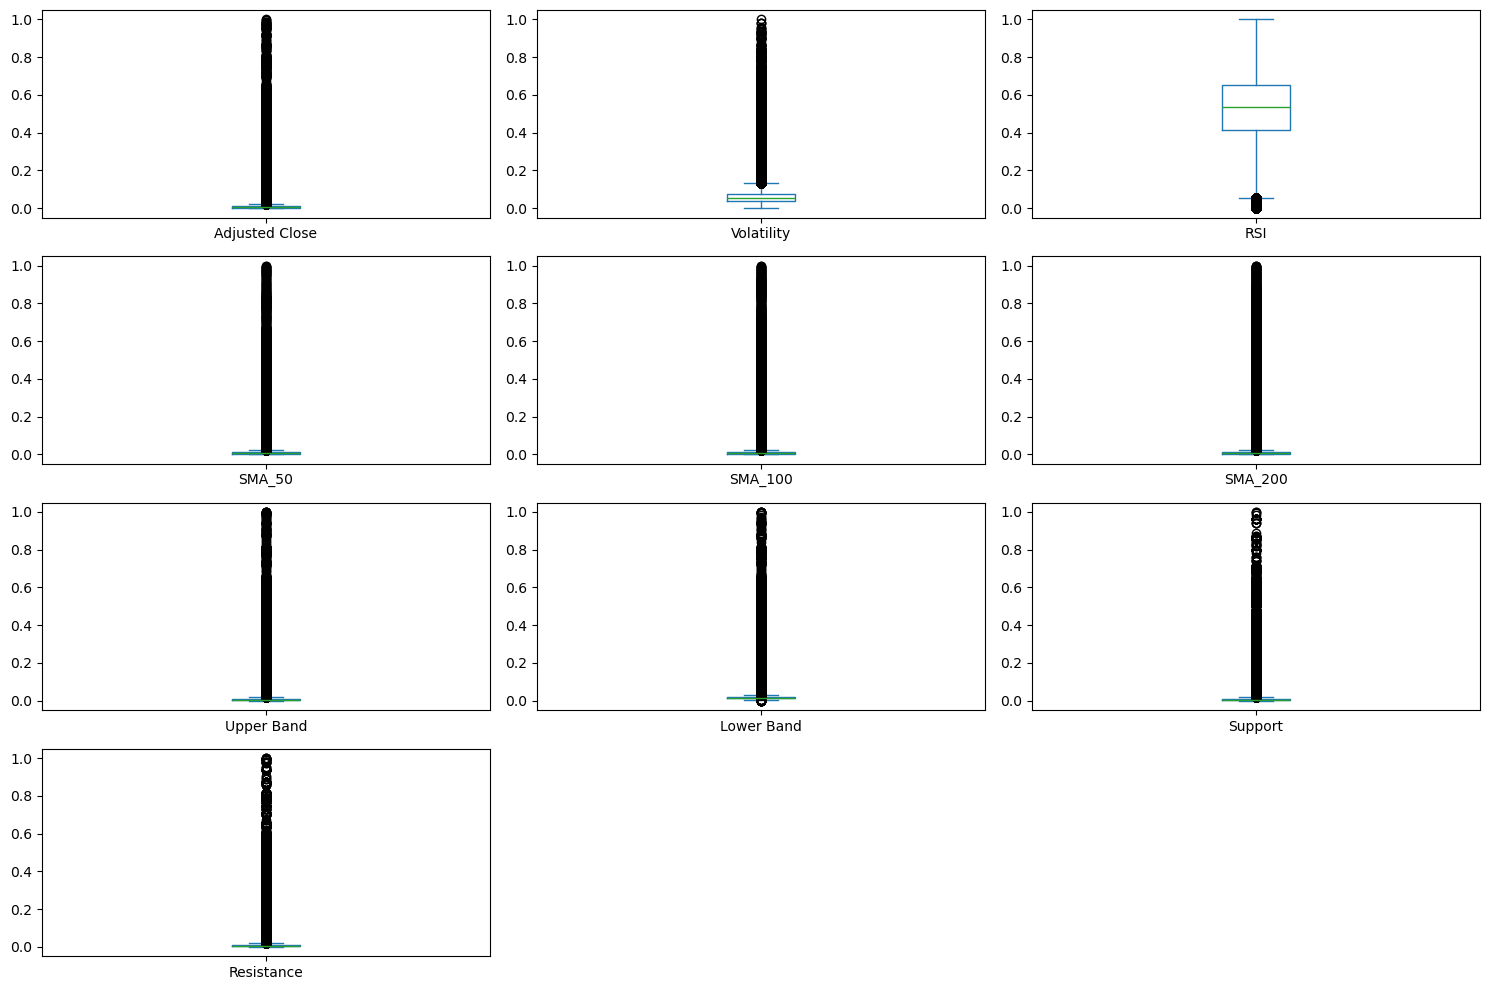

In [22]:
# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
df_minmax_scaled.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

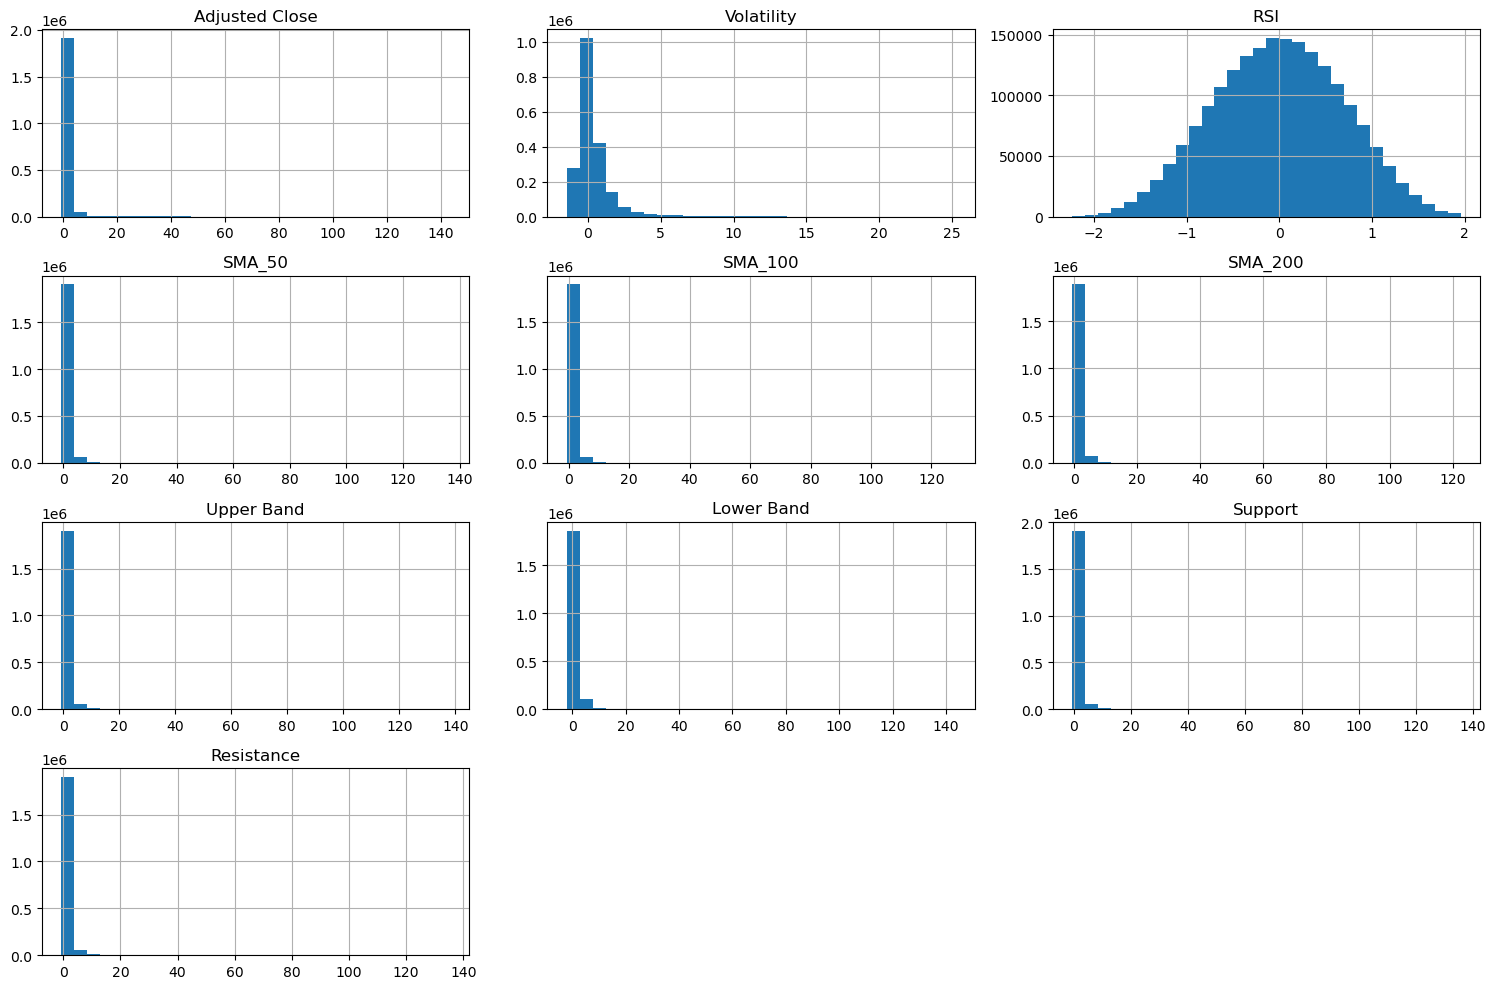

In [20]:
from sklearn.preprocessing import RobustScaler

# RobustScaler
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(X)

# Convert to DataFrame for visualization
df_robust_scaled = pd.DataFrame(scaled_robust, columns=features_to_inspect)

# Plot histograms after scaling
df_robust_scaled.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

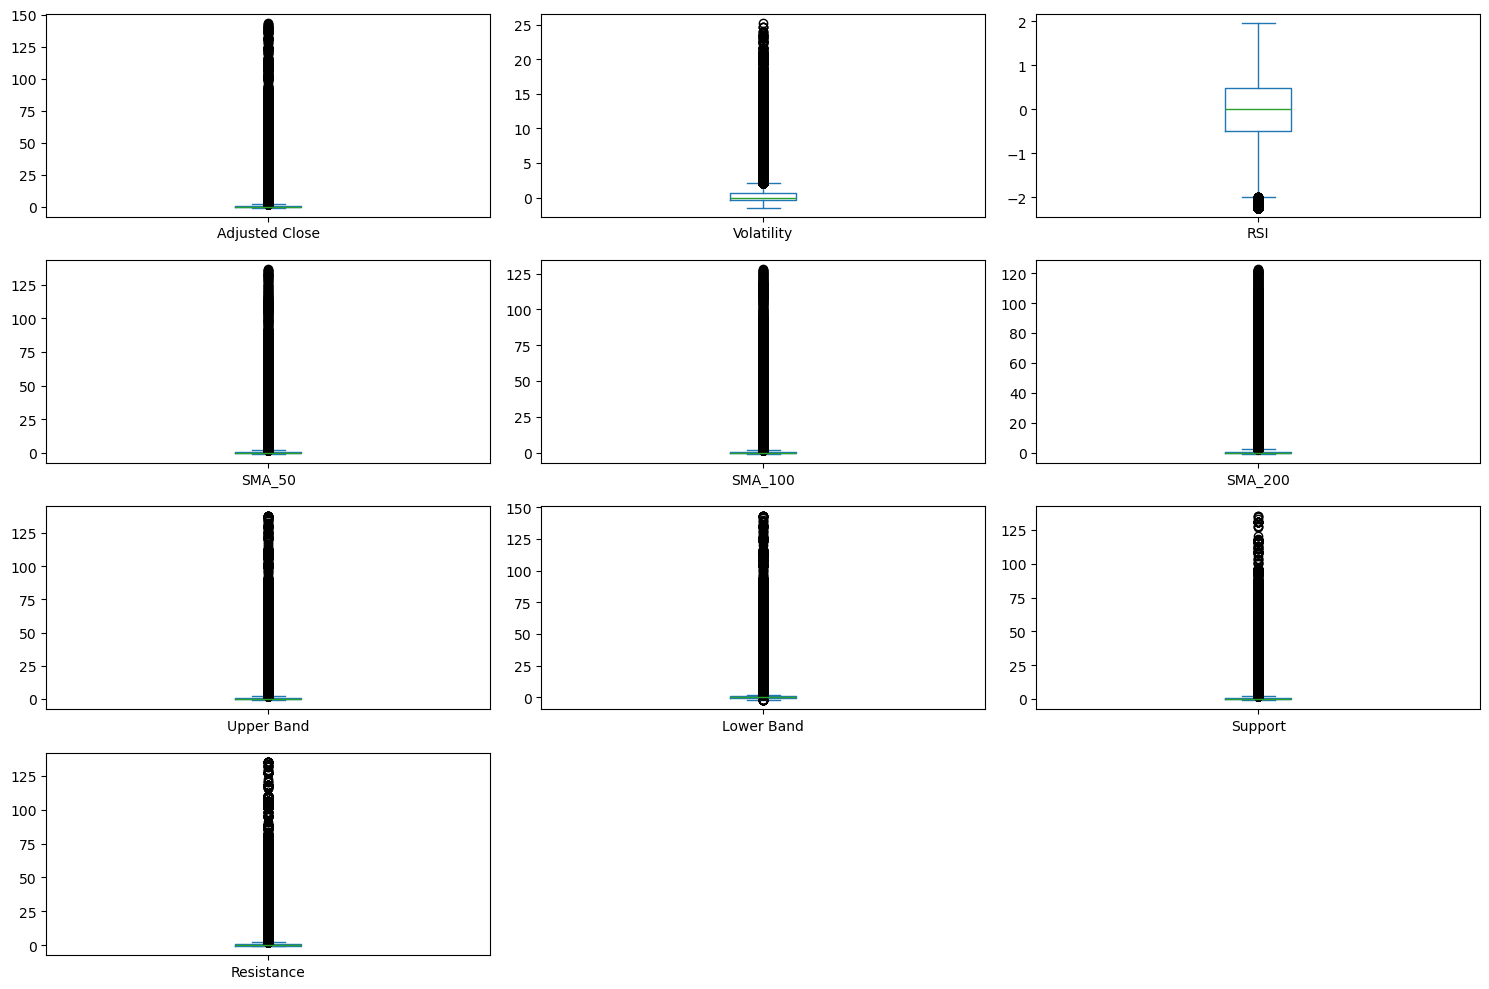

In [23]:
# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
df_robust_scaled.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

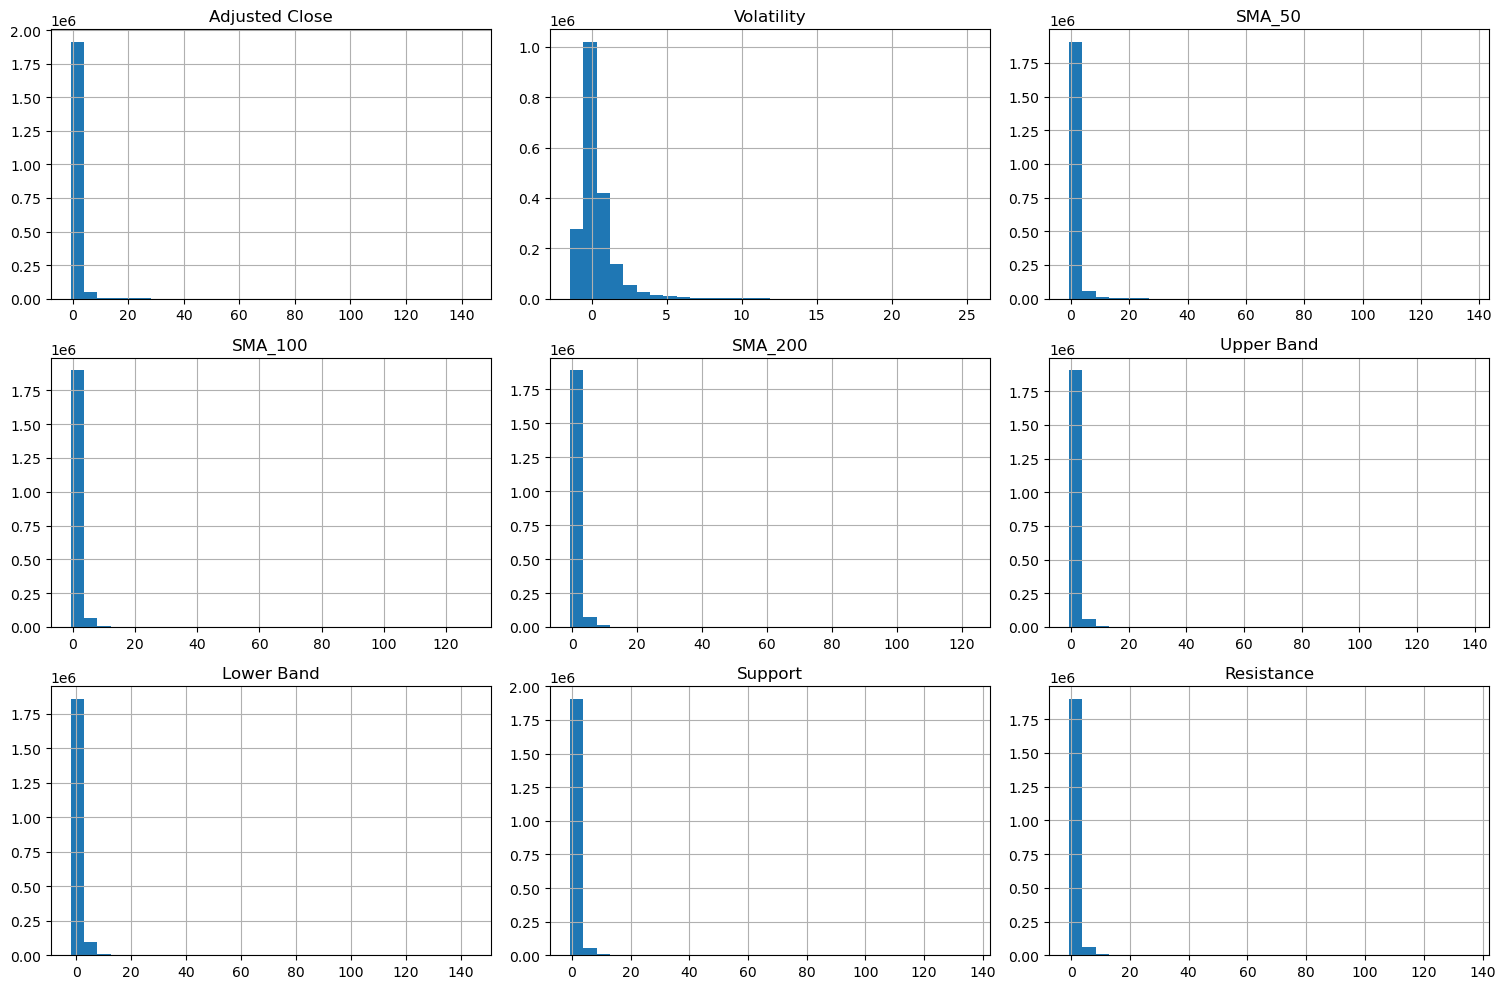

In [27]:
from sklearn.preprocessing import RobustScaler

# List of features with outliers (basically everything except RSI)
features_with_outliers = ['Adjusted Close', 'Volatility', 'SMA_50', 'SMA_100', 
                          'SMA_200', 'Upper Band', 'Lower Band', 'Support', 'Resistance']

# Initialize RobustScaler
scaler_robust = RobustScaler()

# Fit and transform the features with outliers
scaled_outliers = scaler_robust.fit_transform(X[features_with_outliers])

# Convert the scaled data back to a DataFrame for easier handling
df_scaled_outliers = pd.DataFrame(scaled_outliers, columns=features_with_outliers)

# Plot histograms after scaling
df_scaled_outliers.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [31]:
# Check data dataframe for positive or negative number in the columns
# If there are negative numbers, then log transform the columns

# Check for negative numbers
negative_values = X.min() < 0

# Columns with negative values
# columns_with_negative_values = negative_values[negative_values].index

# Log transform columns with negative values
# data[columns_with_negative_values] = data[columns_with_negative_values].apply(lambda x: x + abs(data[columns_with_negative_values].min()) + 1)

negative_values

Adjusted Close    False
Volatility        False
RSI               False
SMA_50            False
SMA_100           False
SMA_200           False
Upper Band        False
Lower Band         True
Support           False
Resistance        False
dtype: bool

In [30]:
import numpy as np

test = X.copy()

# List of features you want to log-transform
log_transform_features = ['Adjusted Close', 'Volatility', 'SMA_50', 'SMA_100', 'SMA_200',
                          'Upper Band', 'Support', 'Resistance']

# Apply log transformation (adding a small constant to avoid log(0) error if necessary)
test[log_transform_features] = X[log_transform_features].apply(lambda x: np.log1p(x))

test


,Adjusted Close,Volatility,RSI,SMA_50,SMA_100,SMA_200,Upper Band,Lower Band,Support,Resistance
0,3.188680,0.015583,48.827618,3.191060,3.190472,3.201320,3.247551,22.540232,3.108705,3.232855
1,1.928087,0.018760,59.067432,1.874642,1.781552,1.648203,1.965129,5.403559,1.729419,1.949737
2,2.951268,0.010429,34.677586,2.951700,2.924679,2.929006,3.007320,18.221804,2.877825,3.002410
3,2.152795,0.015895,45.154190,2.173104,2.183681,2.183144,2.209863,7.378535,2.135743,2.230850
4,3.311895,0.023754,54.812183,3.317018,3.359834,3.383408,3.375100,24.273773,3.249037,3.408360
...,...,...,...,...,...,...,...,...,...,...
1979173,4.885601,0.009484,41.234707,4.902023,4.910059,4.879444,4.933284,131.453340,4.849762,4.931087
1979174,4.900523,0.012234,22.212175,4.911322,4.902339,4.904601,4.952528,130.725700,4.872981,4.948192
1979175,4.656433,0.010632,44.982456,4.688479,4.693743,4.759119,4.697375,101.441536,4.632493,4.761425
1979176,5.921578,0.009546,54.217484,5.872850,5.817756,5.738038,5.940368,362.230320,5.773837,5.936692


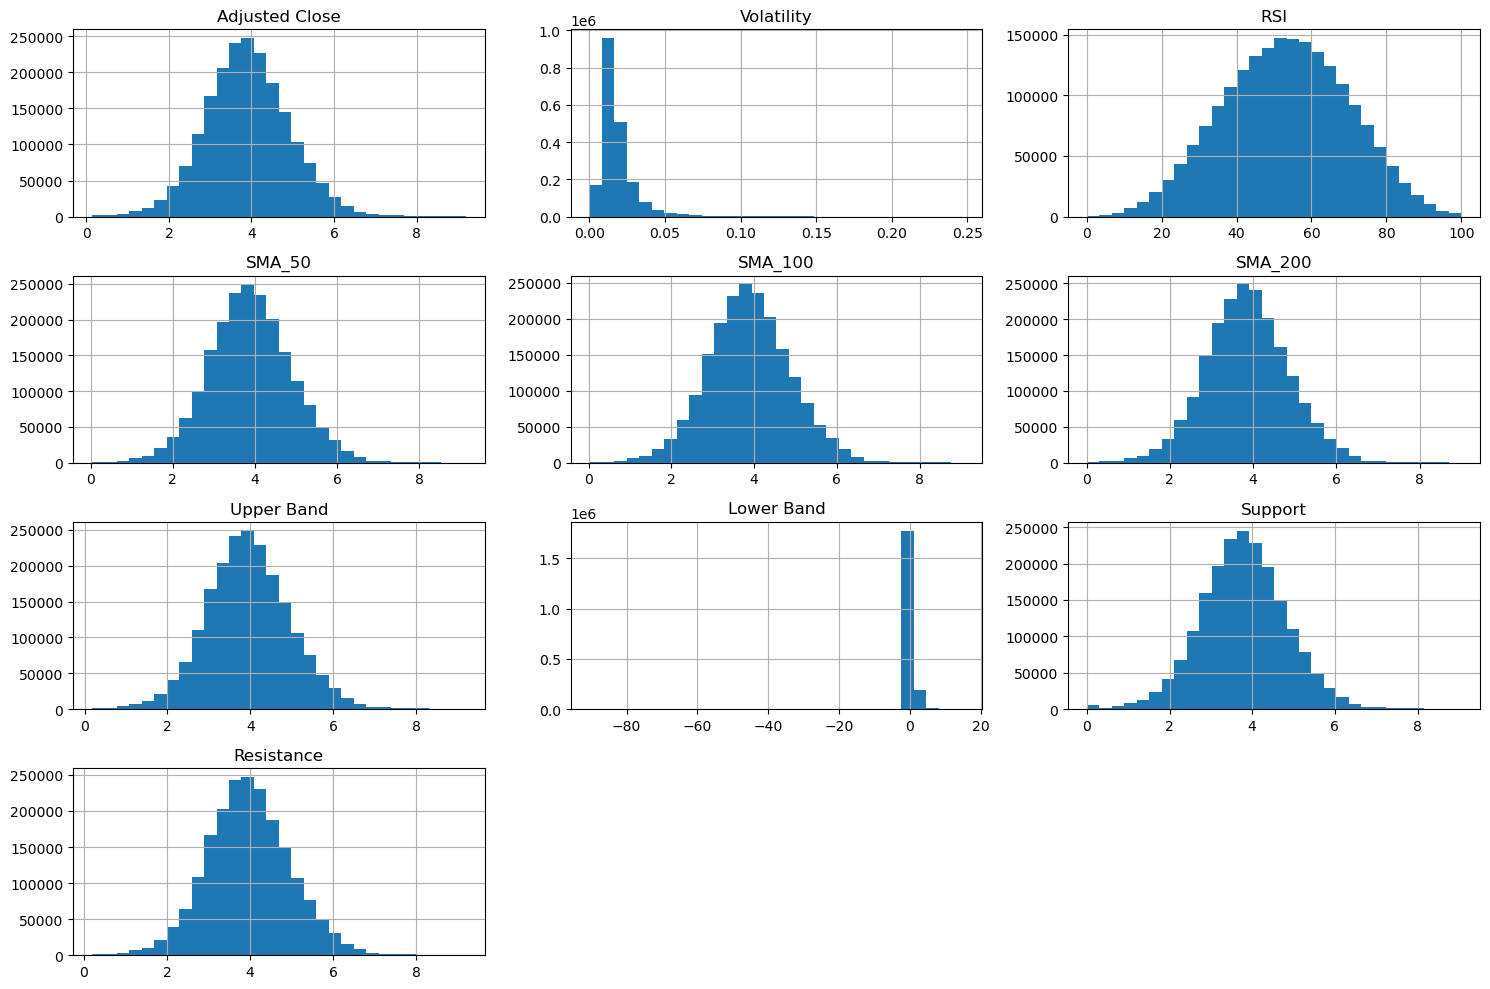

In [33]:
test.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [32]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer for Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation to the appropriate features
transformed_features = ['Lower Band']  # Assuming this has mixed signs
test[transformed_features] = pt.fit_transform(test[transformed_features])